# Data Exploration and Mining of Customer Accounts Receivable from the IBM Public Sample Dataset¶ 
Late payments can cause havoc on a company's cashflow. A model to predict if a customer would be late on a payment can generate insight on extending credit to that customer. It can also assist a company with prioritizing production and delivery of products to customers who will pay on time.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Load the Data Set and Sort by Date

In [2]:
df_original = pd.read_csv("WA_Fn-UseC_-Accounts-Receivable (1).csv")
df_original['InvoiceDate']= pd.to_datetime(df_original.InvoiceDate)
df_dropped =df_original.sort_values(by=['InvoiceDate'])
print(df_dropped.head())
print("\n\n\nThis dataset has:",len(df_dropped)," entries")

      countryCode  customerID PaperlessDate  invoiceNumber InvoiceDate  \
1279          391  6708-DPYTF      8/2/2012     5133177585  2012-01-03   
75            770  3993-QUNVJ    12/31/2012      280670965  2012-01-03   
1584          406  5164-VMYWJ    11/27/2013     6393629835  2012-01-03   
1460          818  1604-LIFKX     3/16/2013     5928070131  2012-01-03   
1494          818  8887-NCUZC     1/22/2013     6050714721  2012-01-03   

       DueDate  InvoiceAmount Disputed SettledDate PaperlessBill  \
1279  2/2/2012          55.37       No   2/16/2012         Paper   
75    2/2/2012          50.39       No   1/23/2012         Paper   
1584  2/2/2012          71.33       No   1/30/2012         Paper   
1460  2/2/2012          97.60       No   2/25/2012         Paper   
1494  2/2/2012          15.99      Yes   2/15/2012         Paper   

      DaysToSettle  DaysLate  
1279            44        14  
75              20         0  
1584            27         0  
1460            53    

In [3]:
#generate the late dependent variable
df_dropped['Late'] = df_dropped['DaysLate'].apply(lambda x: 1 if x >0 else 0)

In [4]:
# generate a rolling count of the amount of late payments for each customer
df_dropped['countlate']=df_dropped.Late.eq(1).groupby(df_dropped.customerID).apply(lambda x : x.cumsum().shift().fillna(0)).astype(int)


## Initial Exploration of the Dataset

#### Database Structure and Analysis
    

In [5]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 1279 to 2046
Data columns (total 14 columns):
countryCode      2466 non-null int64
customerID       2466 non-null object
PaperlessDate    2466 non-null object
invoiceNumber    2466 non-null int64
InvoiceDate      2466 non-null datetime64[ns]
DueDate          2466 non-null object
InvoiceAmount    2466 non-null float64
Disputed         2466 non-null object
SettledDate      2466 non-null object
PaperlessBill    2466 non-null object
DaysToSettle     2466 non-null int64
DaysLate         2466 non-null int64
Late             2466 non-null int64
countlate        2466 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(6)
memory usage: 359.4+ KB


In [6]:
df_dropped.describe(include=np.object)


,customerID,PaperlessDate,DueDate,Disputed,SettledDate,PaperlessBill
count,2466,2466,2466,2466,2466,2466
unique,100,91,681,2,695,2
top,9149-MATVB,3/3/2012,1/29/2013,No,4/28/2013,Paper
freq,36,58,10,1905,10,1263


#### Frequency of Categorical Variables
Frequency tables quickly describe the data and the amount time a given categorical variable shows up in our dataset.

In [7]:
print(pd.crosstab(index=df_dropped["Disputed"], columns="count"))
print(pd.crosstab(index=df_dropped["customerID"], columns = "count"))
print(pd.crosstab(index=df_dropped["countryCode"], columns="count"))
print(pd.crosstab(index=df_dropped["Late"], columns="count"))


col_0     count
Disputed       
No         1905
Yes         561
col_0       count
customerID       
0187-ERLSR     16
0379-NEVHP     27
0465-DTULQ     26
0625-TNJFG     28
0688-XNJRO     34
0706-NRGUP     18
0709-LZRJV     25
0783-PEPYR     21
1080-NDGAE     31
1168-BEASA     23
1408-OQZUE     23
1447-YZKCL     23
1604-LIFKX     20
2026-XLBER     21
2125-HJDLA     21
2423-QOKIO     21
2447-JCFGW     23
2621-XCLEH     15
2676-DZINU     26
2687-XWAMA     28
2820-XGXSB     24
2824-HJQPP     30
3271-HYHDN     18
3271-YDPUJ     19
3448-OWJOT     28
3568-JJMFW     28
3569-VJWXS     24
3598-DNURW     20
3676-CQAIF     17
3831-FXWYK     26
...           ...
7841-HROAQ     22
7856-ODQFO     28
7938-EVASK     21
7946-HJDUR     30
8102-ABPKQ     27
8156-PCYBM     31
8364-UWVLM     21
8389-TCXFQ     33
8690-EEBEO     31
8820-BLYDZ     24
8887-NCUZC     35
8942-ERSWK     30
8976-AMJEO     27
9014-WENVB     22
9117-LYRCE     23
9149-MATVB     36
9174-IYKOC     29
9181-HEKGV     23
9212-BTDMX     28


#### Which customers are late to pay the most often?
It may be important to know who is always late with payments. It is also useful to know which customers never are late. You may want to extend benefits to those who always pay on time. On the contrary you may want to put extra stipulations on those who are habitually late on payments. 

In [8]:
customer_latecount =pd.crosstab(index=df_dropped["customerID"], columns=df_dropped['Late'])
customer_latecount.sort_values(by=[1], ascending = False)

Late,0,1
customerID,,
0688-XNJRO,2,32
8102-ABPKQ,1,26
8690-EEBEO,5,26
6708-DPYTF,5,25
4460-ZXNDN,3,25
3448-OWJOT,5,23
7228-LEPPM,1,23
9883-SDWFS,8,23
8887-NCUZC,13,22


### Generate more features and map the some of the categorical variables to integers
Map some of the categorical variables to integers. It is also helpful to generate some more insights about a customer given the data. For example if the order occurs at the end of the year is a company more likely to pay on time?

In [9]:
df_dropped['Disputed'] = df_dropped['Disputed'].map({'No':0,'Yes':1})
df_dropped['PaperlessBill'] = df_dropped['PaperlessBill'].map({'Paper': 0,'Electronic': 1})


In [10]:
df_dropped['InvoiceQuarter']= pd.to_datetime(df_dropped['InvoiceDate']).dt.quarter
df_dropped['SettleTime'] = pd.to_datetime(df_dropped['SettledDate'])- pd.to_datetime(df_dropped['InvoiceDate'])


## How many payments are late by other variables?
Generate some visualizations to help understand some of the categorical variables better. 

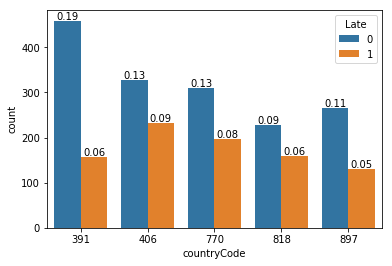

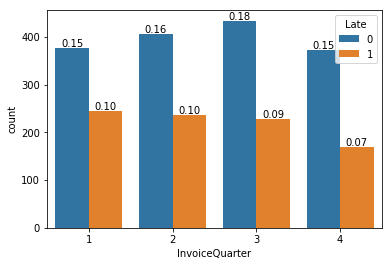

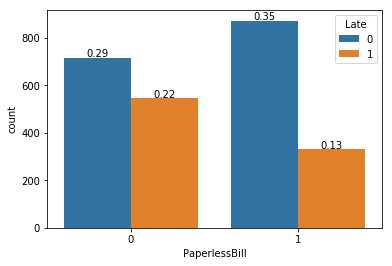

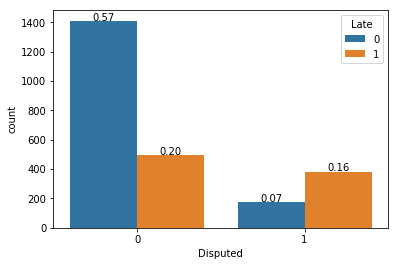

In [11]:
plt.figure(1)
ax = sns.countplot(df_dropped['countryCode'],hue=df_dropped['Late'])
total = float(len(df_dropped['countryCode']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.figure(2)
ax = sns.countplot(df_dropped['InvoiceQuarter'],hue=df_dropped['Late'])
total = float(len(df_dropped['InvoiceQuarter']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.figure(3)
ax = sns.countplot(df_dropped['PaperlessBill'],hue= df_dropped['Late'])
total = float(len(df_dropped['PaperlessBill']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.figure(4)
ax= sns.countplot(df_dropped['Disputed'],hue=df_dropped['Late'])
total = float(len(df_dropped['Disputed']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")


#### Distributions of Invoice Amounts and Days to settle
It may be useful to understand the distribution of some variables. This can be helpful if we wish to know within reasonable assumptions what our confidence intervals are for payments or how long it takes for a customer to settle.

C:\Users\hknighton\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


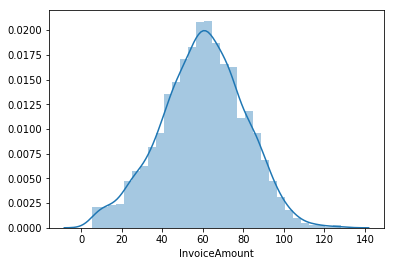

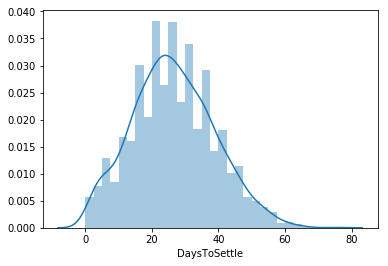

In [12]:
plt.figure(1)
sns.distplot(df_original['InvoiceAmount'])
plt.figure(2)
sns.distplot(df_original['DaysToSettle'])

Finally, label customers with integers for processing in models

In [13]:
labels = df_dropped['customerID'].astype('category').cat.categories.tolist()
replace_map_comp = {'customerID' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
#replace the customerID with Integers
df_dropped.replace(replace_map_comp, inplace=True)

## Train a Model to Predict if a Payment will be late


###                   Feature Selection
Weight of Evidence or WOE is a good way to decide which variables to use for binary classification. It is a measure of how much a variable supports a given hypotheis(i.e. whether a customer will be late on payments). 

The source code is available at https://github.com/Sundar0989/WOE-and-IV. 



In [14]:
from woe_iv import *


In [15]:
data_col = ['countryCode',"InvoiceAmount","PaperlessBill",'InvoiceQuarter','customerID','Late','countlate']

df1 = df_dropped[data_col]


In [16]:
final_iv, IV = data_vars(df1 , df1['Late'])

In [17]:
final_iv.sort_values(by=['IV'], ascending = False)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
11,countlate,0.00,1.00,1013,158,0.155972,855,0.844028,0.180160,0.538074,-1.094153,0.819416
12,countlate,2.00,5.00,690,236,0.342029,454,0.657971,0.269099,0.285714,-0.059912,0.819416
13,countlate,6.00,31.00,763,483,0.633028,280,0.366972,0.550741,0.176211,1.139580,0.819416
4,PaperlessBill,0.00,0.00,1263,546,0.432304,717,0.567696,0.622577,0.451227,0.321896,0.119296
5,PaperlessBill,1.00,1.00,1203,331,0.275145,872,0.724855,0.377423,0.548773,-0.374318,0.119296
6,InvoiceQuarter,1.00,2.00,1264,481,0.380538,783,0.619462,0.548461,0.492763,0.107088,0.014792
7,InvoiceQuarter,3.00,3.00,661,227,0.343419,434,0.656581,0.258837,0.273128,-0.053741,0.014792
8,InvoiceQuarter,4.00,4.00,541,169,0.312384,372,0.687616,0.192702,0.234110,-0.194642,0.014792
2,InvoiceAmount,5.26,60.55,1233,419,0.339822,814,0.660178,0.477765,0.512272,-0.069736,0.004765
3,InvoiceAmount,60.57,128.28,1233,458,0.371452,775,0.628548,0.522235,0.487728,0.068359,0.004765


In [18]:
features = ["PaperlessBill",'InvoiceQuarter','countlate','InvoiceAmount','countryCode','customerID',]

## Training Models and Evaluating

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve, classification_report
knn= KNeighborsClassifier(n_neighbors=10)
lg = LogisticRegression(solver = 'liblinear')
rf = RandomForestClassifier()

In [24]:

X = df_dropped[features]
y = df_dropped['Late']

In [21]:
X_train,X_test,y_Train,y_test = train_test_split(X,y,random_state=0)

In [29]:
model1 = lg.fit(X_train,y_Train)
prediction = lg.predict(X_test)
model2 = knn.fit(X_train,y_Train)
prediction2 = model2.predict(X_test)
model3= rf.fit(X_train,y_Train)
prediction3 = model3.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test,prediction))
print("K Nearest Neighbor")
print(classification_report(y_test,prediction2))
print("Random Forest")
print(classification_report(y_test,prediction3))

Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       387
           1       0.68      0.46      0.55       230

   micro avg       0.72      0.72      0.72       617
   macro avg       0.70      0.66      0.67       617
weighted avg       0.71      0.72      0.70       617

K Nearest Neighbor
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       387
           1       0.67      0.40      0.50       230

   micro avg       0.70      0.70      0.70       617
   macro avg       0.69      0.64      0.64       617
weighted avg       0.70      0.70      0.68       617

Random Forest
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       387
           1       0.68      0.52      0.59       230

   micro avg       0.73      0.73      0.73       617
   macro avg       0.72      0.69      0.69       617
weighted avg       0.

In [137]:
print(confusion_matrix(y_test,prediction))
print(confusion_matrix(y_test,prediction2))
knn.score(X_test,y_test)



[[337  50]
 [125 105]]
[[327  60]
 [110 120]]


0.7244732576985413

Test the Generalization of the Model

In [37]:
scores = []
from sklearn.model_selection import KFold
N_FOLDS = 10
kf = KFold(n_splits= N_FOLDS, shuffle = False, random_state = 0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = KNeighborsClassifier()
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
print("Nearest Neighbor Results:")   
print("Mean:", np.mean(scores))
print("STEV:", np.std(scores))

Nearest Neighbor Results:
Mean: 0.7251061518712353
STEV: 0.04200096176063161


In [38]:
scores = []
N_FOLDS = 10
kf = KFold(n_splits= N_FOLDS, shuffle = False, random_state = 0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = LogisticRegression(solver = 'liblinear')
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))

print("Logistic Regression Results:")    
print("Mean:", np.mean(scores))
print("STEV:", np.std(scores))

Logistic Regression Results:
Mean: 0.7385520555610414
STEV: 0.0806632214847043


In [39]:
scores = []
N_FOLDS = 10
kf = KFold(n_splits= N_FOLDS, shuffle = False, random_state = 0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(n_estimators = len(features))
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))

print    
print("Mean:", np.mean(scores))
print("STEV:", np.std(scores))

Mean: 0.742164510713933
STEV: 0.052197179064558424


The logistic regression model and random forest have a higher accuracy than KNN. It also has a higher variance in outcome. While the accuracy of this model may not be as high as we like it does demonstrate a simple dataset can provide useful insights for regular business operations. 

## Report the coefficients to be used  deployment by Billing/Accounting Departments

In [129]:
coef_dict={}
for coef, feat in zip(model1.coef_[0,:],features):
    coef_dict[feat] = coef
    
print(coef_dict)

{'PaperlessBill': -1.777259775459455, 'InvoiceQuarter': -0.27074664252052183, 'countlate': 0.25465406020262293, 'InvoiceAmount': 0.008946943251345147, 'countryCode': 0.00048087161851707795}
